In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
df = pd.read_csv("Students_Grading_Dataset.csv")

In [43]:
df.drop_duplicates(inplace=True)

In [44]:
df.dropna(inplace=True)

In [45]:
df.drop(columns=["Student_ID", "First_Name", "Last_Name", "Email"], inplace=True)

In [46]:
df = pd.get_dummies(df, drop_first=True)

In [47]:
scaler = MinMaxScaler()
num_cols = ['Age', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
            'Projects_Score', 'Total_Score', 'Study_Hours_per_Week',
            'Stress_Level (1-10)', 'Sleep_Hours_per_Night']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [48]:
features = ['Attendance (%)', 'Midterm_Score', 'Final_Score',
            'Projects_Score', 'Study_Hours_per_Week']
target = 'Total_Score'

In [49]:
X = df[features]
y = df[target]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [52]:
y_pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2 Score: -0.00659922863903839
MSE: 0.08336065336248108


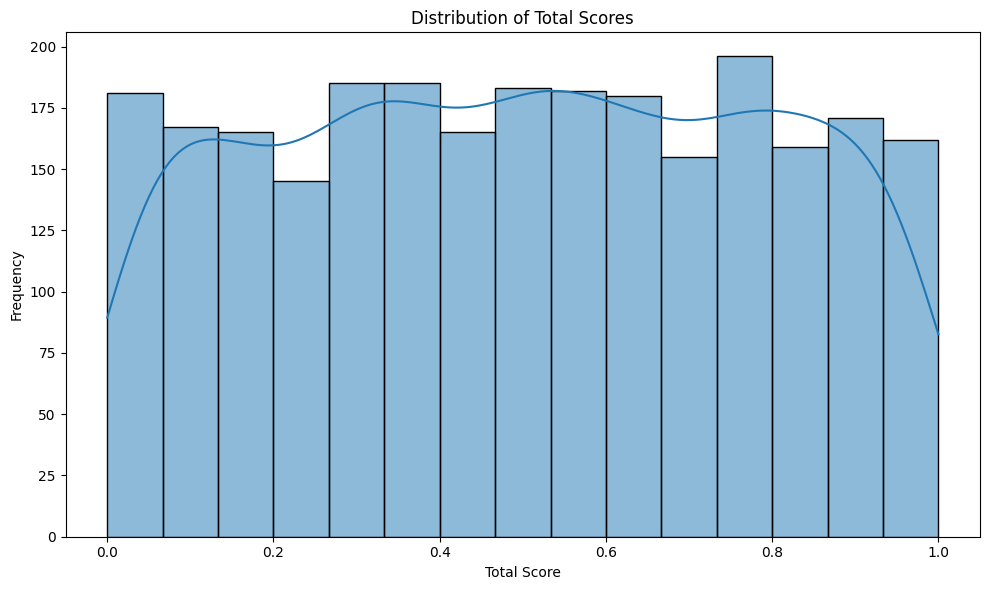

In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Total_Score'], kde=True)
plt.title('Distribution of Total Scores')
plt.xlabel('Total Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig("total_score_histogram.png")
plt.show()

In [54]:
df['Score_Level'] = pd.cut(df['Total_Score'],
                           bins=[0, 0.33, 0.66, 1.0],
                           labels=['Low', 'Medium', 'High'])

In [55]:
print(df[['Total_Score', 'Score_Level']].head())

   Total_Score Score_Level
0     0.121297         Low
2     0.405725      Medium
3     0.232186         Low
4     0.322258         Low
8     0.912530        High


Classification Report:
              precision    recall  f1-score   support

           0       0.30      0.38      0.34       161
           1       0.32      0.28      0.30       179
           2       0.23      0.21      0.22       176
           3       0.00      0.00      0.00         1

    accuracy                           0.29       517
   macro avg       0.21      0.22      0.21       517
weighted avg       0.28      0.29      0.28       517

Confusion Matrix:
[[61 40 60  0]
 [68 50 61  0]
 [73 66 37  0]
 [ 0  0  1  0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


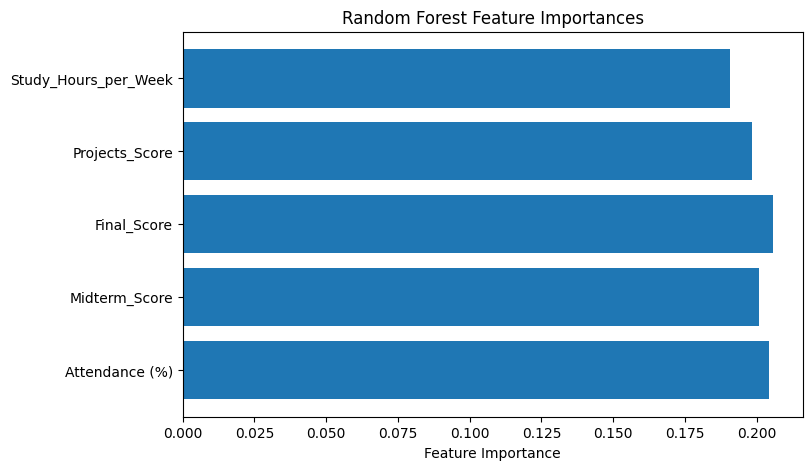

In [56]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

X = df[['Attendance (%)', 'Midterm_Score', 'Final_Score', 'Projects_Score', 'Study_Hours_per_Week']]
y = df['Score_Level']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

importances = clf.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 5))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.show()


In [57]:
print(df.columns.tolist())

['Age', 'Attendance (%)', 'Midterm_Score', 'Final_Score', 'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score', 'Projects_Score', 'Total_Score', 'Study_Hours_per_Week', 'Stress_Level (1-10)', 'Sleep_Hours_per_Night', 'Gender_Male', 'Department_CS', 'Department_Engineering', 'Department_Mathematics', 'Grade_B', 'Grade_C', 'Grade_D', 'Grade_F', 'Extracurricular_Activities_Yes', 'Internet_Access_at_Home_Yes', 'Parent_Education_Level_High School', "Parent_Education_Level_Master's", 'Parent_Education_Level_PhD', 'Family_Income_Level_Low', 'Family_Income_Level_Medium', 'Score_Level']
